In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor


In [65]:
df = pd.read_csv('laptop_prices.csv')

In [66]:
df.shape

(1275, 23)

In [67]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [68]:
df.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

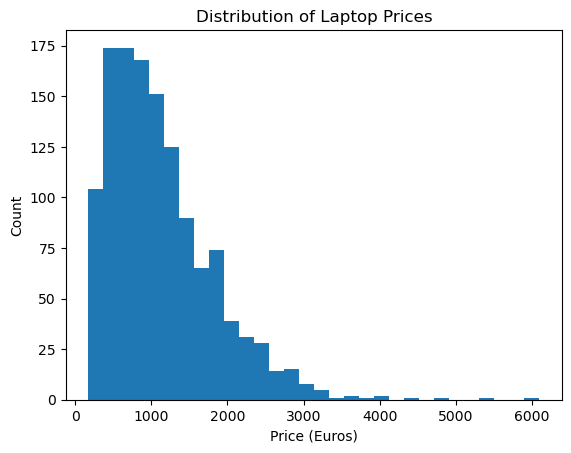

In [69]:
plt.figure()
plt.hist(df['Price_euros'], bins=30)
plt.xlabel('Price (Euros)')
plt.ylabel('Count')
plt.title('Distribution of Laptop Prices')
plt.show()

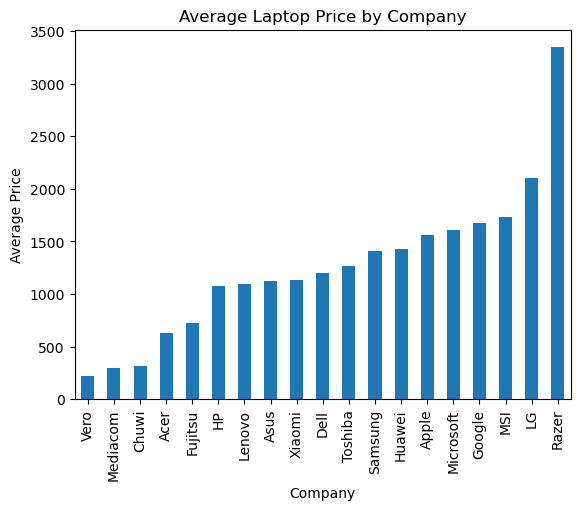

In [70]:
avg_company_price = df.groupby('Company')['Price_euros'].mean().sort_values()

plt.figure()
avg_company_price.plot(kind='bar')
plt.xlabel('Company')
plt.ylabel('Average Price')
plt.title('Average Laptop Price by Company')
plt.xticks(rotation=90)
plt.show()

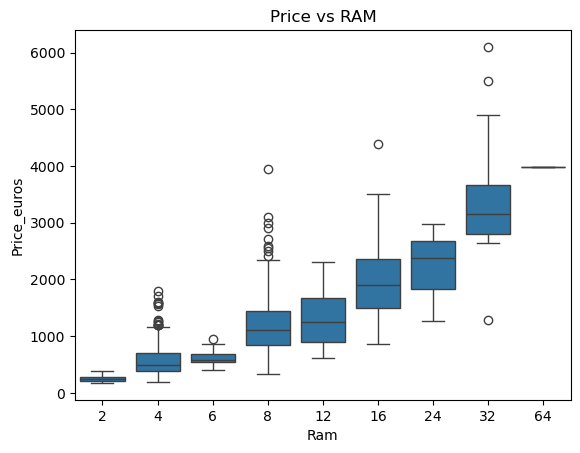

In [71]:
plt.figure()
sns.boxplot(x='Ram', y='Price_euros', data=df)
plt.title('Price vs RAM')
plt.show()


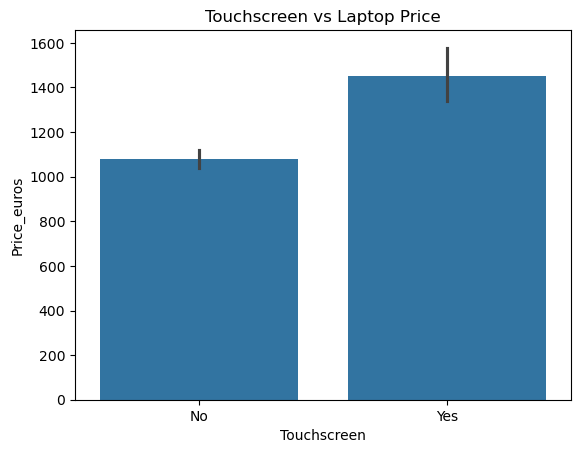

In [72]:
plt.figure()
sns.barplot(x='Touchscreen', y='Price_euros', data=df)
plt.title('Touchscreen vs Laptop Price')
plt.show()


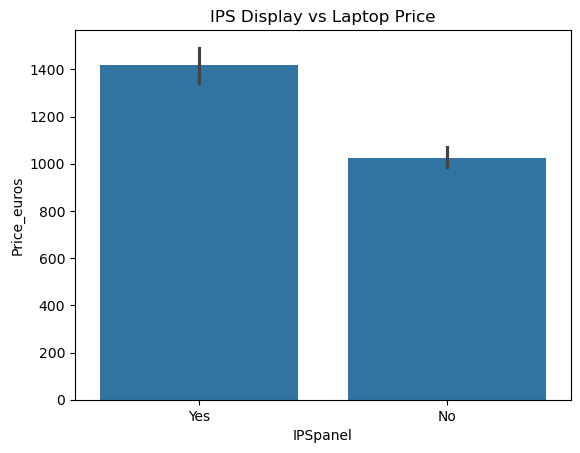

In [73]:
plt.figure()
sns.barplot(x='IPSpanel', y='Price_euros', data=df)
plt.title('IPS Display vs Laptop Price')
plt.show()


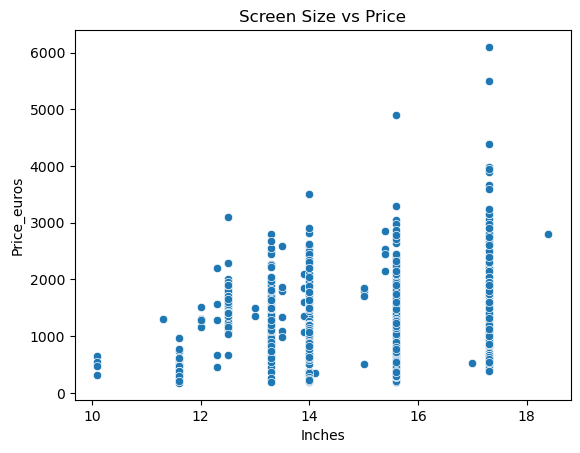

In [74]:
plt.figure()
sns.scatterplot(x='Inches', y='Price_euros', data=df)
plt.title('Screen Size vs Price')
plt.show()


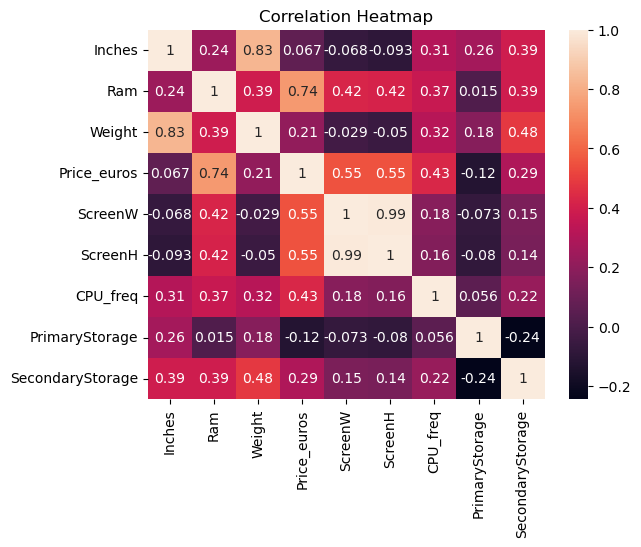

In [75]:
plt.figure()
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Correlation Heatmap')
plt.show()


In [76]:
df = df.drop(columns=['Product'], errors='ignore')


In [77]:
le = LabelEncoder()

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [78]:
X = df.drop('Price_euros', axis=1)
y = df['Price_euros']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [80]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [81]:
y_pred = model.predict(X_test)

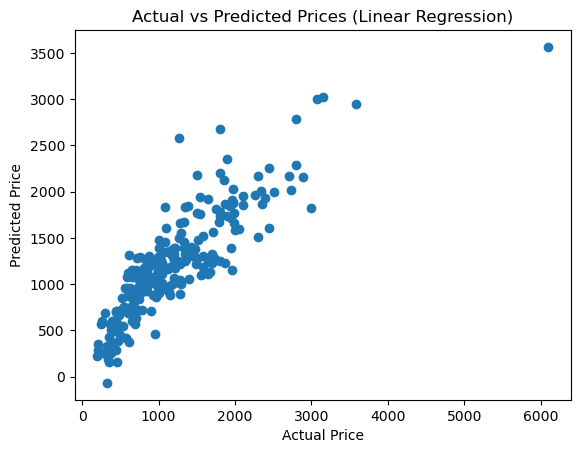

In [82]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.show()


In [83]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)



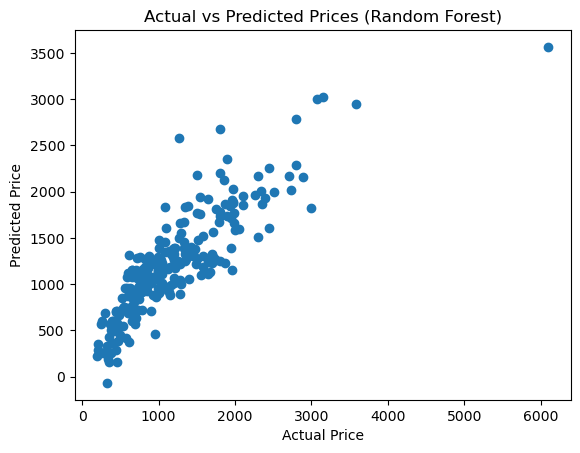

In [84]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.show()


In [85]:
feature_importance = pd.Series(
    rf.feature_importances_, index=X.columns
).sort_values(ascending=False)

feature_importance


Ram                     0.570672
Weight                  0.103266
TypeName                0.053029
CPU_freq                0.049364
CPU_model               0.043236
GPU_model               0.029612
Inches                  0.025965
Company                 0.022743
PrimaryStorage          0.018986
Screen                  0.015094
ScreenH                 0.014313
ScreenW                 0.012778
OS                      0.009799
IPSpanel                0.006859
PrimaryStorageType      0.006835
SecondaryStorageType    0.005532
GPU_company             0.004421
Touchscreen             0.004273
SecondaryStorage        0.002450
CPU_company             0.000560
RetinaDisplay           0.000214
dtype: float64

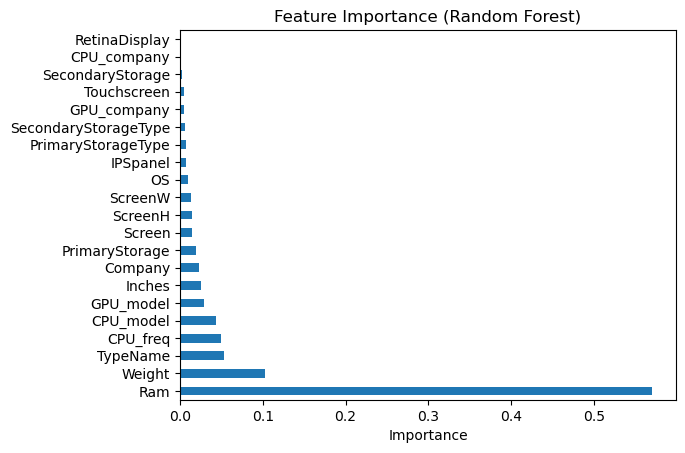

In [86]:
plt.figure()
feature_importance.plot(kind='barh')
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()

In [87]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 259.929265369942


In [88]:
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


R2 Score: 0.7407686417057306


In [89]:
print("RF MAE:", mean_absolute_error(y_test, rf_pred))
print("RF R2:", r2_score(y_test, rf_pred))


RF MAE: 166.5072136153128
RF R2: 0.8738114500627339
